In [1]:
import numpy as np
import matplotlib.pyplot as plt

For Daniel

In [2]:
class Config():
    def __init__(self,
                 lower_bound,
                 upper_bound,
                 normalization_mean,
                 normalization_std_dev):
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.normalization_mean = normalization_mean
        self.normalization_std_dev = normalization_std_dev
        
    def __repr__(self):
        return f"""lower_bound: {self.lower_bound}
upper_bound: {self.upper_bound}
normalization_mean: {self.normalization_mean}
normalization_std_dev: {self.normalization_std_dev}"""

In [3]:
class DataCleaner():
    
    def __init__(self,data, config):
        self.data = data
        self.config = config
        self.redo_metrics()
        
    def redo_metrics(self):
        self.mean = np.mean(self.data)
        self.std_dev = np.std(self.data)   
        
    def run_default_pipeline(self):
        self.trim()
        self.normalize()
        
    def trim(self):
        self.data = np.clip(self.data, self.config.lower_bound, self.config.upper_bound)
        self.redo_metrics()
    
    def normalize(self):
        self.data = np.divide(self.data - self.mean, self.std_dev)
        self.data = self.data * self.config.normalization_std_dev + self.config.normalization_mean
        self.redo_metrics()
        

In [4]:
raw_data = [1,5,2,7,4,8,4,9,3,6,5,4]

In [5]:
config_1 = Config(lower_bound=3,upper_bound=7, normalization_mean=5, normalization_std_dev=1)
test_1 = DataCleaner(raw_data, config_1)
test_1.trim()
test_1.normalize()
test_1.trim()
config_1

lower_bound: 3
upper_bound: 7
normalization_mean: 5
normalization_std_dev: 1

In [6]:
config_2 = Config(lower_bound=1,upper_bound=9, normalization_mean=5, normalization_std_dev=1)
test_2 = DataCleaner(raw_data, config_2)
test_2.trim()
test_2.normalize()
config_2

lower_bound: 1
upper_bound: 9
normalization_mean: 5
normalization_std_dev: 1

In [13]:
for config in [config_1,config_2]:
    test = DataCleaner(raw_data, config)
    test.trim()
    test.normalize()
    print("="*40)
    print(config)
    print(f"Random metric: for demonstration purposes: {test.std_dev}")

lower_bound: 3
upper_bound: 7
normalization_mean: 5
normalization_std_dev: 1
Random metric: for demonstration purposes: 1.0
lower_bound: 1
upper_bound: 9
normalization_mean: 5
normalization_std_dev: 1
Random metric: for demonstration purposes: 0.9999999999999999


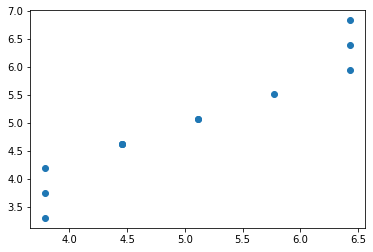

In [7]:
plt.scatter(x=test_1.data, y=test_2.data,)